In [14]:
# Temel kütüphaneler
import numpy as np  # Sayısal işlemler için
import pandas as pd  # Veri işleme ve analiz için

# Veriyi bölme ve ölçeklendirme işlemleri için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regresyon Ağacı modeli için
from sklearn.tree import DecisionTreeRegressor

# Model performansını değerlendirmek için metrikler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Görselleştirme için (opsiyonel)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree


In [15]:
#Verimizi Yükleyelim
data=pd.read_csv('Mall_Customers.csv')

In [16]:
#Bilgi Toplayalım
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
#Eksik Veri Kontrolü
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
#İstatiksel Özet
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
#İlk 5 satır görelim
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
#Bağımlı ve Bağımsız Değişkenleri Seçelim
X=data[['Age','Annual Income (k$)']]
y=data['Spending Score (1-100)']


In [22]:
#Verimizi Test ve Train olarak Bölelim
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [23]:
#Model Kuralım
model=DecisionTreeRegressor(max_depth=5,random_state=42)

In [24]:
#Modeli Eğitmeliyiz
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [25]:
#Tahminlerimizi yapalım
y_pred=model.predict(X_test)

In [26]:
#Hata-Ölçümleri Yapalım
print("Hata-Test Ölçümleri")
mse=mean_squared_error(y_test,y_pred)
print("Mean Squaed Error Değer:",mse)
print("-----------------------------")
r2=r2_score(y_test,y_pred)
print("R2 Skor Değeri:",r2)

Hata-Test Ölçümleri
Mean Squaed Error Değer: 325.241095420656
-----------------------------
R2 Skor Değeri: 0.34060275845297217


Text(0.5, 1.0, 'Regresyon Agacı Görselleştirmesi')

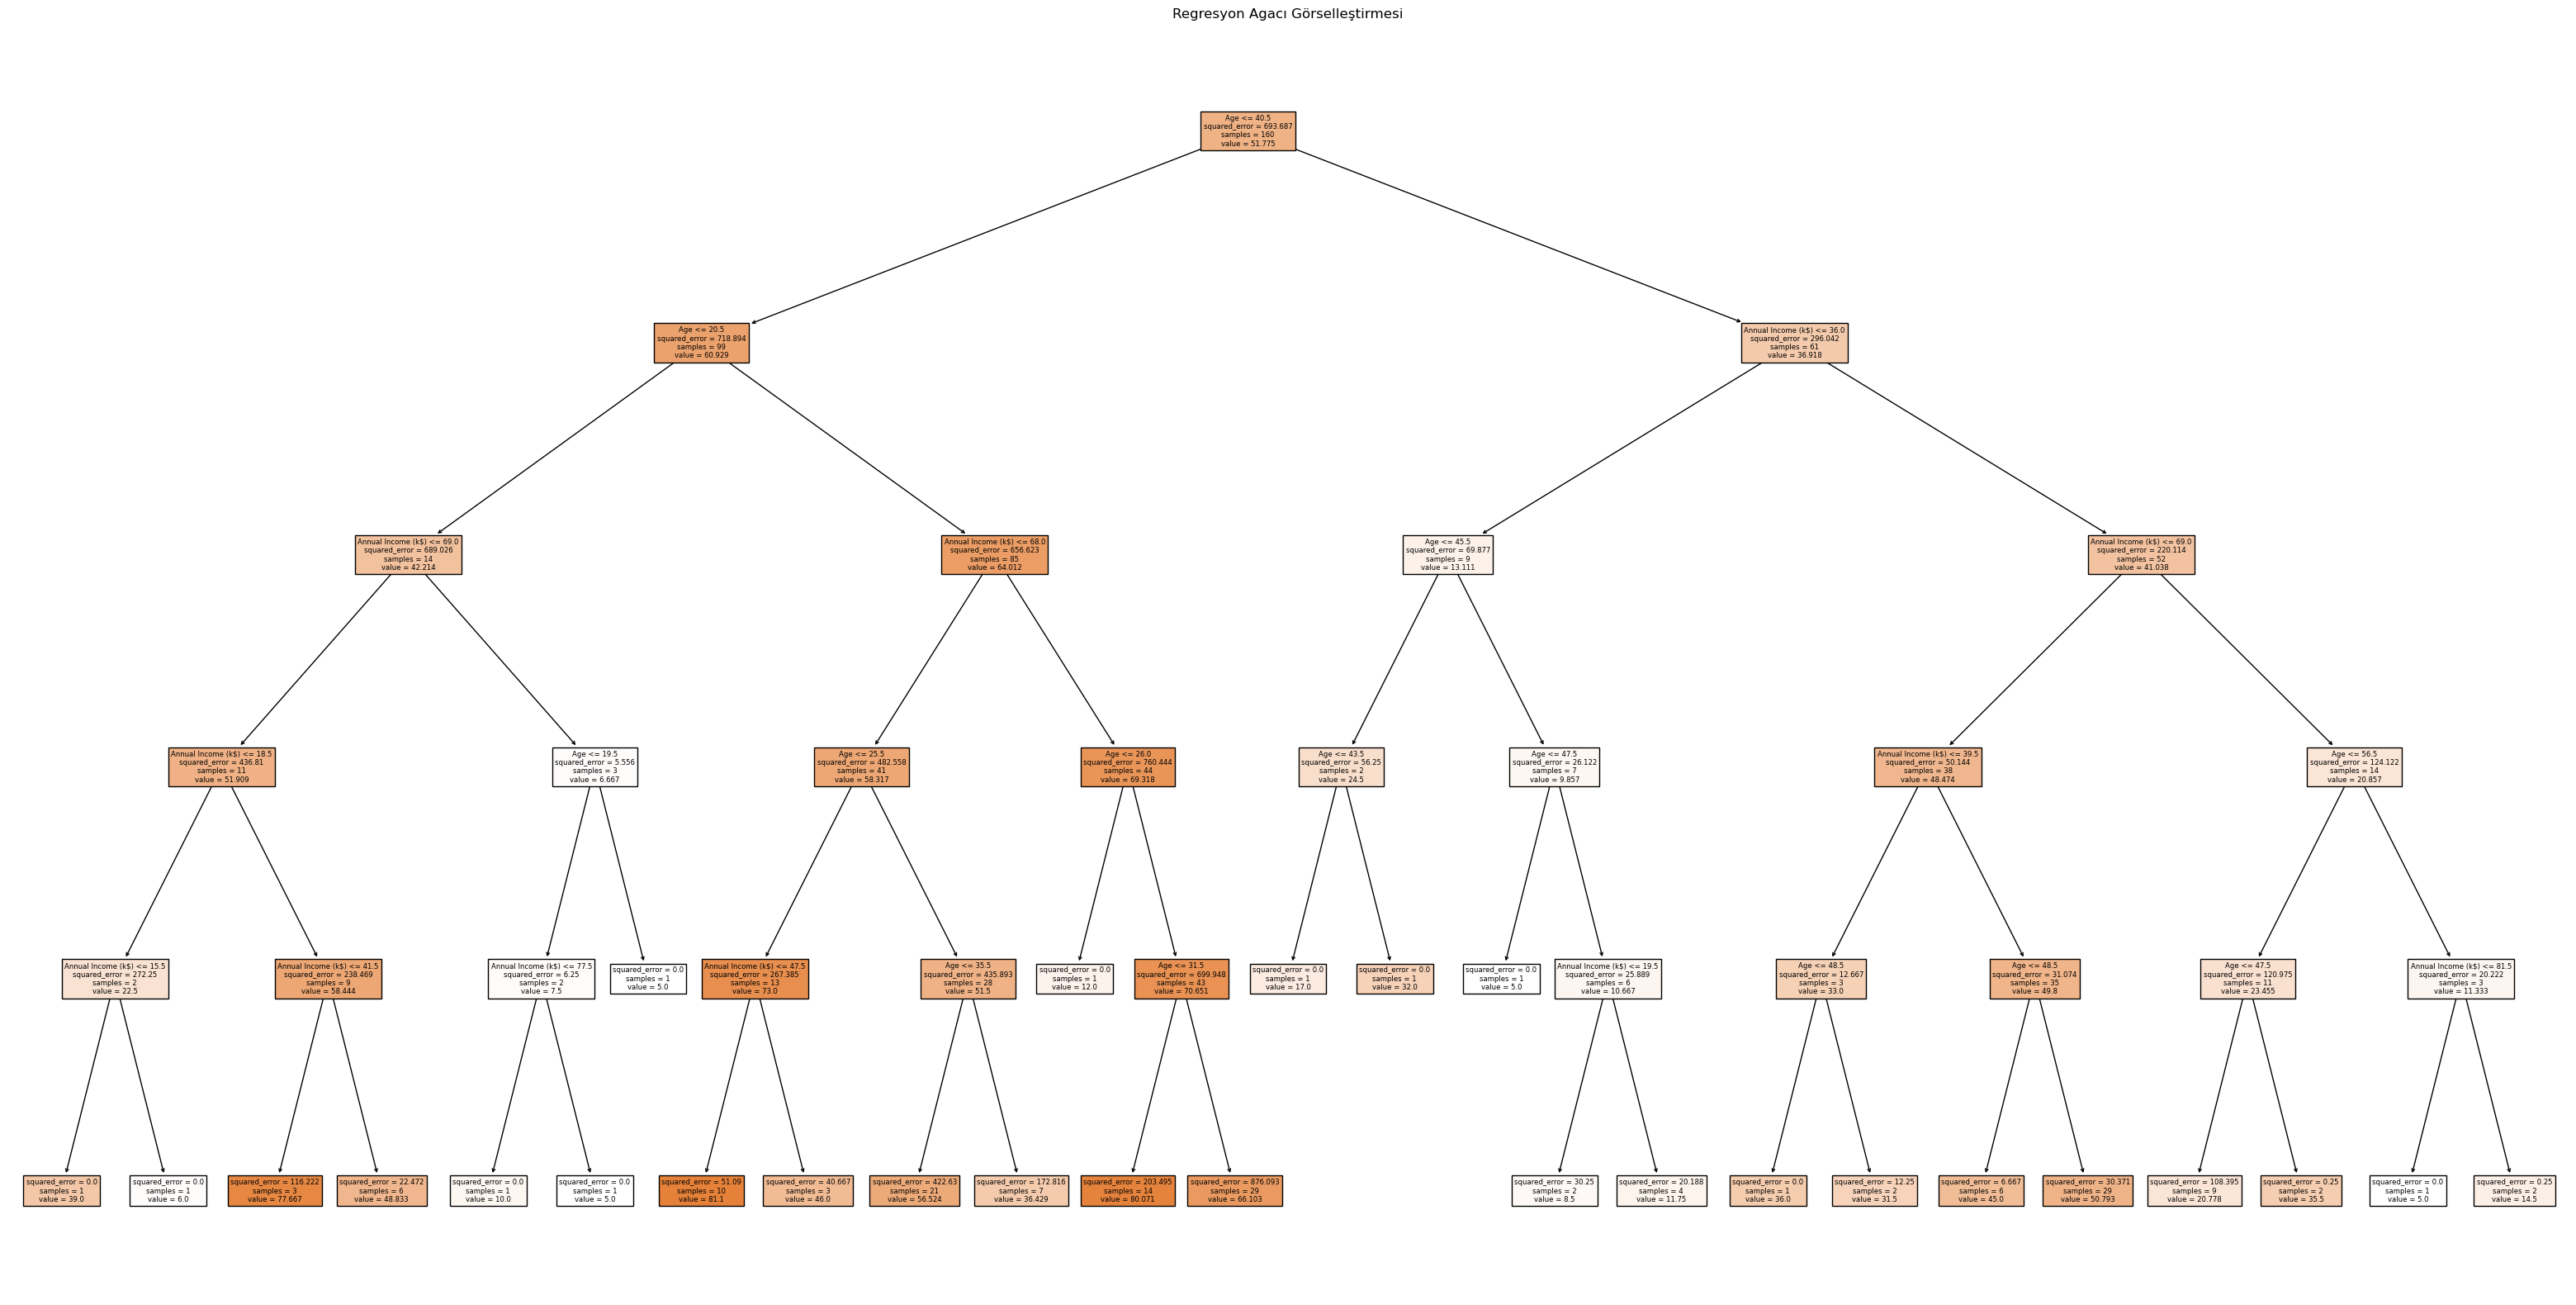

In [31]:
#Görselleştirmeleri Kuralım
plt.figure(figsize=(40,20))
tree.plot_tree(model,feature_names=['Age','Annual Income (k$)'],filled=True)
plt.title('Regresyon Agacı Görselleştirmesi')